# Numpy, Pandas, Matplotlib,seaborn(Beautiful Plots Quickly),Plotly(Dynamic Plots)

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sys
import matplotlib.pyplot as plt

In [3]:
#pd.read_csv(R'UScomments.csv')
comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')
comments.head()


/var/folders/9l/1zvwrh914mz1090xph0s4k0h0000gn/T/ipykernel_11001/499890492.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', on_bad_lines='skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [5]:
comments.dropna(inplace=True)
# dropna remove missing values

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

APProx 70k data points big data

In [7]:
comments.shape

(691374, 4)

# Performing Sentiment Analysis

Analysing Sentiments of user [-1,1] polarity value negative to positive sentiment 
Textblob Package is used for sentiment analysis because it is most common 

In [8]:
from textblob import TextBlob
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [9]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

we will focus on polarity [-1,1]
As data is too much so first try with thousand comments

In [10]:
sample_data= comments[0:1000]
sample_data


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
995,Ayb_2qbZHm4,Generic attention comment,0,0
996,Ayb_2qbZHm4,Zero amount of funny,0,0
997,Ayb_2qbZHm4,Honest? I see no random color hairgender studi...,0,0
998,Ayb_2qbZHm4,"What, no joke about how you can't apply if you...",0,0


In [11]:
sample_data.shape

(1000, 4)

Add polarity value of all comments in list

In [12]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
#print(polarity)

In [13]:
comments['polarity']=polarity
print(comments.head(100))

       video_id                                       comment_text likes   
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4  \
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
..          ...                                                ...   ...   
95  XpVt6Z1Gjjo                                #1 trending whoaaaa     1   
96  XpVt6Z1Gjjo                      MY BOIIII IS #1 TRENDING LMAO     2   
97  XpVt6Z1Gjjo                                  #1 on treading!!!     2   
98  XpVt6Z1Gjjo  *eyyyjooooo Good morning loooganng WHATS POPPP...     2   
99  XpVt6Z1Gjjo                        Good Job on trending Logan.     2   

   replies  polarity  
0        0     0.000  
1        0     0.000  
2        0     0.0

# WorldCloud Analysis--- Graphical Representation of text data so that we can understand which are most important Keywords

Filtering Positive Comments

In [14]:
filter1 = comments['polarity']==1                 ########
Positive_comments = comments[filter1]
print(Positive_comments)

           video_id                                       comment_text likes   
64      XpVt6Z1Gjjo                                    yu are the best     1  \
156     cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227     WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307     sjlHnJvXdQs                                  This is priceless     0   
319     sjlHnJvXdQs                                Summed up perfectly     0   
...             ...                                                ...   ...   
691373  EoejGgUNmVU                             Perfect. Every version     0   
691383  EoejGgUNmVU                                  Me encantaaaaa <3     0   
691388  EoejGgUNmVU                                   Best song ever 🤘     0   
691389  EoejGgUNmVU                              excellent performance     0   
691393  EoejGgUNmVU                                                 <3     0   

       replies  polarity  
64          

Filtering Negative Comments

In [15]:
filter2= comments['polarity'] == -1
Negative_comments = comments[filter2]
print(Negative_comments)


           video_id                                       comment_text likes   
512     8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0  \
562     8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952     Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371    vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391    vu_9muoxT50                    cheeseus christ thats insane!!!     0   
...             ...                                                ...   ...   
690788  Hlt3rA-oDao                                Like Kelly she evil     0   
690865  Ni5Uc-DdMqk                     R U FUCKING KIDDING ME?!?!?!?!    11   
691073  4kmSATD25iY           This is horribly offensive please report     0   
691180  xlu6i6lT_vk  Sink holes looks terrifying sinkholes sink you...     0   
691224  qRoVlH1OcI4  Trump talked to the president of US Virgin Isl...     0   

       replies  polarity  
512         

Stopwords are the words that does't make any sense to my analysis meaningless words(is,the,i,to etc)  so exclude these words

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

So don't include these words

In [18]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [19]:
type(comments['comment_text'])

pandas.core.series.Series

It is a series type data structure but we want string datastructure for wordcloud so use join function to convert it

In [20]:
total_positive_comments = ' '.join(Positive_comments['comment_text'])

In [21]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

(-0.5, 399.5, 199.5, -0.5)

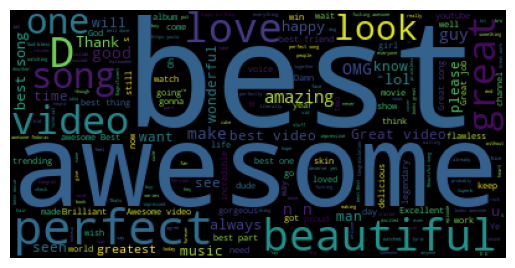

In [22]:
plt.imshow(wordcloud)
plt.axis('off')

Now see for negative

In [23]:
total_negative_comments = ' '.join(Negative_comments['comment_text'])

In [24]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

(-0.5, 399.5, 199.5, -0.5)

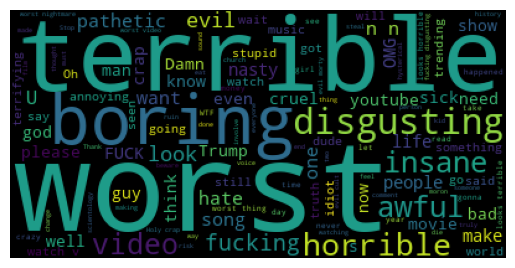

In [25]:
plt.imshow(wordcloud2)
plt.axis('off')

Now Perform Emoji Analysis

pip install emoji==2.2.0

In [26]:
pip install emoji==2.2.0


Note: you may need to restart the kernel to use updated packages.


In [27]:
import emoji as em

In [28]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [29]:
comment = 'trending 😉'
[char for char in comment if char in em.EMOJI_DATA]

['😉']

Explanation of above code is below

In [30]:
# upper one is list comprehension code
emoji_list=[]
for char in comment:
    if char in em.EMOJI_DATA:
        emoji_list.append(char)

In [31]:
emoji_list

['😉']

Now Perform on whole data

In [32]:
all_emoji_list=[]
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in em.EMOJI_DATA:
            all_emoji_list.append(char)

In [33]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

But i want to know number of times an emoji has been used so use collections package

In [34]:
from collections import Counter

In [35]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [36]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [37]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [38]:
Counter(all_emoji_list).most_common(10)[1][0]

'😍'

In [39]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [40]:
freq = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [41]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [42]:
trace = go.Bar(x=emojis, y= freq)

In [43]:
iplot([trace])